In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'E:\Data Set\csv file\AirPassengers.csv', parse_dates=[0], index_col='Month')

In [3]:
data.head(3)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


# Besics Checks

In [5]:
data.shape

(144, 1)

In [6]:
data.dtypes

#Passengers    int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [8]:
data.isnull().sum()

#Passengers    0
dtype: int64

In [9]:
data.rename(columns={'#Passengers':'Passengers'}, inplace=True)

In [10]:
data.head(3)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


# EDA

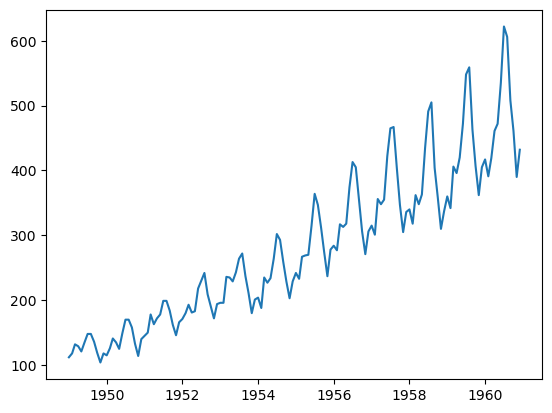

In [12]:
plt.plot(data)
plt.show()

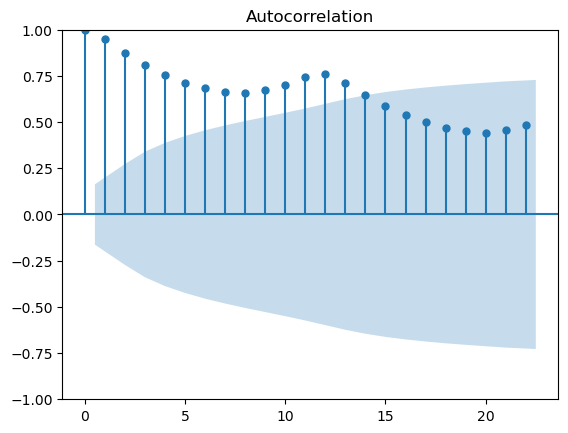

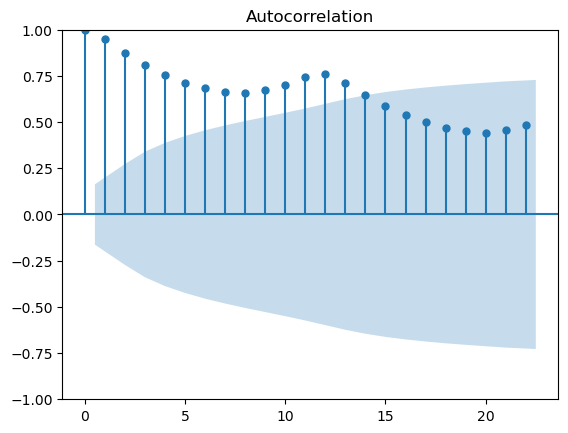

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [14]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.Passengers, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  0.8153688792060433
2. P-Value :  0.9918802434376409
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


In [15]:
data1=data.diff(periods=1)
data1

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [16]:
data1=data1.iloc[1:] #null value discarded
data1

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


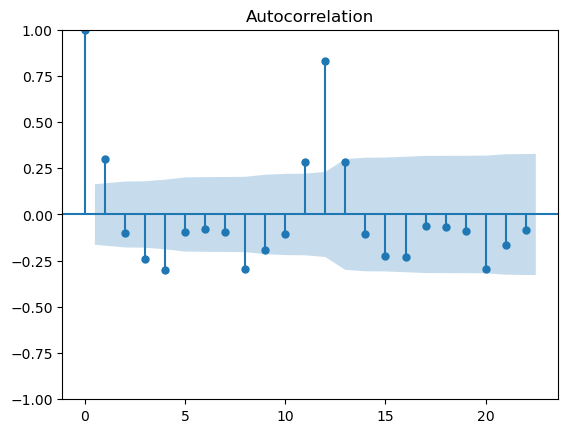

In [17]:
plot_acf(data1); # autocorrelation plot 

In [18]:
data2=data1.diff(periods=1) # differencing applied to data1
data2

,Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


In [19]:
data2=data2.iloc[1:] # integrated to the order of 2

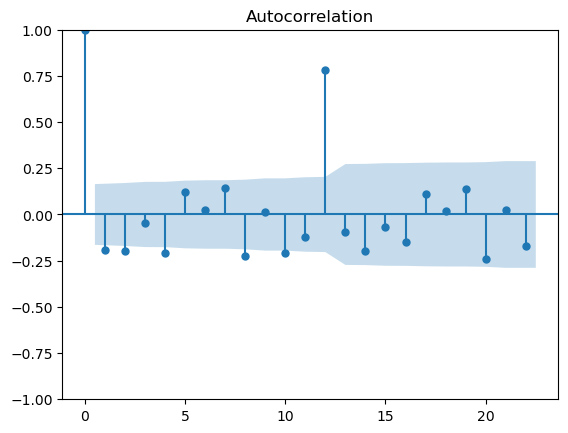

In [20]:
plot_acf(data2);

In [21]:
data2.shape#shape of the data rows and columns

(142, 1)

In [22]:
## Creating training and test sets
train=data2[:100] #from 0th row to 99th row - traning data
test=data2[100:] #from 100th row to end - testing data

In [23]:
train.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1949-03-01 to 1957-06-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [24]:
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [25]:
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data1,maxlag=15,glob=True)
mod.ar_lags

[1, 8, 12, 13]

In [26]:
## model creation
ar_model=AutoReg(train,lags=[1,8,12,13]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

In [27]:
##making prediction
prediction=ar_model_fit.predict(start=100,end=142)

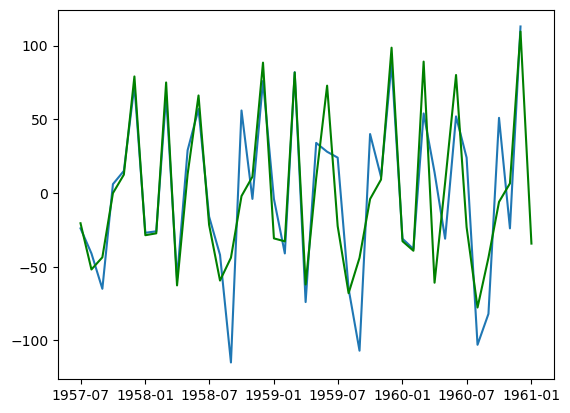

In [28]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

## ARIMA Model

In [30]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [32]:
## evaluate the model
print(model_arima_fit.aic)

1021.0396389673771


In [33]:
## predicting the output of sample points
predictions = model_arima_fit.forecast(steps=9)

In [34]:
predictions

1957-07-01    37.765356
1957-08-01    48.751565
1957-09-01    43.323244
1957-10-01    46.005395
1957-11-01    44.680135
1957-12-01    45.334950
1958-01-01    45.011404
1958-02-01    45.171269
1958-03-01    45.092279
Freq: MS, Name: predicted_mean, dtype: float64

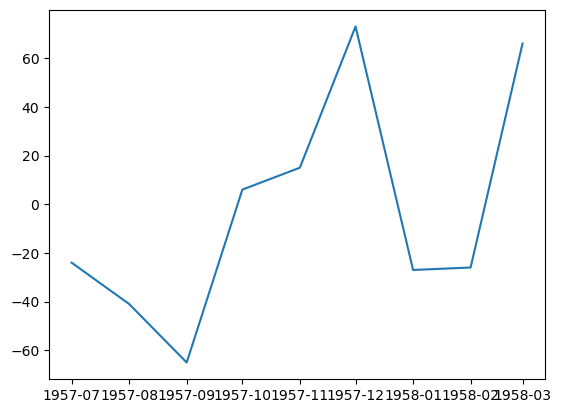

In [35]:
plt.plot(test[:9])

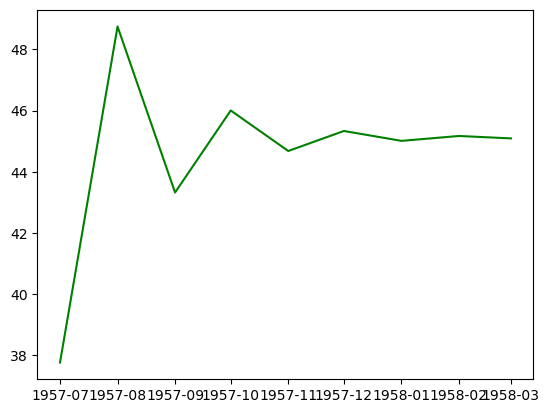

In [36]:
## plotting the ARIMA forecast values using random pdq
plt.plot(predictions,color='green')

In [37]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [38]:
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
    try:
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 967.9135518309452
(0, 0, 1) 931.4372811387827
(0, 0, 2) 925.7296597890354
(0, 0, 3) 920.9009365869475
(0, 0, 4) 912.6569548569356
(0, 1, 0) 1046.731900142016
(0, 1, 1) 963.8739376848637
(0, 1, 2) 933.2127130868208
(0, 1, 3) 926.5735785642252
(0, 1, 4) 924.3112396946991
(0, 2, 0) 1143.9983209809495
(0, 2, 1) 1043.75705847546
(0, 2, 2) 966.1634301555338
(0, 2, 3) 941.6087932672474
(0, 2, 4) 933.7559669155659
(0, 3, 0) 1247.2070979669813
(0, 3, 1) 1139.8659455609602
(0, 3, 2) 1044.6471525439379
(0, 3, 3) 972.3661389094476
(0, 3, 4) 955.712567345872
(0, 4, 0) 1351.0676099210136
(0, 4, 1) 1241.6050826101402
(0, 4, 2) 1139.202346063153
(0, 4, 3) 1048.6667748509085
(0, 4, 4) 987.1654844633272
(1, 0, 0) 963.0127961436173
(1, 0, 1) 928.7077561796135
(1, 0, 2) 919.8685615541775
(1, 0, 3) 921.8388178374034
(1, 0, 4) 923.3886062526261
(1, 1, 0) 1021.0396389673771
(1, 1, 1) 959.49796683164
(1, 1, 2) 962.9514176496721
(1, 1, 3) 923.2263539487154
(1, 1, 4) 923.1013309834376
(1, 2, 0) 1098.8

In [39]:
min(list2)  # lowest aic score

904.9117928323417

In [40]:
# pdq corresponding to lowest aic
loc=list2.index(min(list2))
list1[loc]

(4, 0, 3)

In [41]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [42]:
forecast = model_arima_fit.forecast(steps=9)
forecast 

1957-07-01   -51.877436
1957-08-01   -22.751407
1957-09-01    22.963518
1957-10-01   -22.792799
1957-11-01     5.529459
1957-12-01    28.124169
1958-01-01   -28.701068
1958-02-01    -0.725012
1958-03-01    26.552982
Freq: MS, Name: predicted_mean, dtype: float64

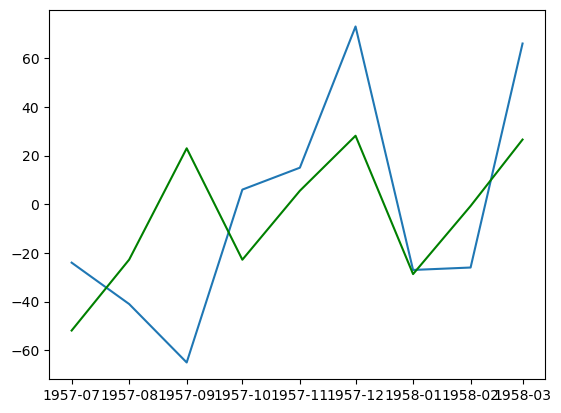

In [43]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [44]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([ -24.,  -41.,  -65.,    6.,   15.,   73.,  -27.,  -26.,   66.,
        -58.,   29.,   57.,  -16.,  -42., -115.,   56.,   -4.,   76.,
         -4.,  -41.,   82.,  -74.,   34.,   28.,   24.])

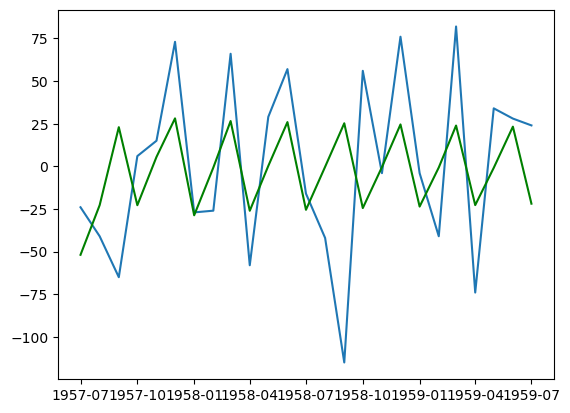

In [45]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [46]:
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': 2351.3571771970346,
 'mae': 38.285633046304696,
 'rmse': 48.49079476763641}

In [94]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))
  
# Calculate mean squared error
mean_squared_error(test1, forecast25) 


48.49079476763641


2351.3571771970346